<p>#1 - If a node has 30 training instances of class A, and 50 training instances of class B, then the estimated probability of class A is 30/(30 + 50).  
   What is the Gini index value for this node?</p>
   
   <p>Answer:<br>
    p = 30/(30 + 50) = 0.375<br>
    Gini = 2p(1-p) = 2(.375)(1-.375) = 0.46875</p>

In [1]:
#2 - Fill in the code below to create a function that gives the Gini value for a node in a binary classification tree given values for the number of instances of each class. 
#    class_counts is a list of length two.   

def gini(class_counts):
    """ return the Gini value for a node in a binary classif. tree """
    if sum(class_counts) == 0:
        return 0

    p = class_counts[0]/sum(class_counts)
    return 2 * p * (1 - p)


In [2]:
#3 Test the function
print(gini([30, 50]))
print(gini([10, 10]))
print(gini([20, 0]))
print(gini([100, 0]))

0.46875
0.5
0.0
0.0


In [3]:
#4 read and preprocess the data.
import seaborn as sns
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/heart.csv")
df['output'] = df['output'] - 1

df = df[['age', 'maxhr', 'restbp', 'output']]

<AxesSubplot:xlabel='age', ylabel='maxhr'>

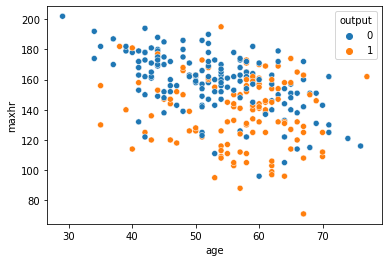

In [4]:
#5 5.	Run the code and look at the plot.  If we were going to build a classification tree, and split first on 'age', 
# what do you think a good age value to split on would be? - about 55 years
sns.scatterplot(x='age', y='maxhr', hue='output', data=df)


In [5]:
#6 - Compute the Gini index for df as a whole.  
# For this you just need the number of rows with output = 0 and the number of rows with output = 1.
gini_root = gini([(df['output'] == i).sum() for i in [0,1]])
print("Gini of df: " + str(gini_root))

Gini of df: 0.49382716049382713


In [6]:
#7.	Now consider a split on age < 50.  Write code to compute the Gini index for the case of of age < 50 and the Gini index for the case of age >= 50.  
# For the case of age < 50, get the rows of df where age < 50, then count the number of rows with output = 0 and output = 1.  
split_val = 50
df_lo = df[df['age'] < split_val]
df_hi = df[df['age'] >= split_val]

counts_lo = [(df_lo['output'] == i).sum() for i in [0,1]]
counts_hi = [(df_hi['output'] == i).sum() for i in [0,1]]

gini_lo = gini(counts_lo)
gini_hi = gini(counts_hi)

print("Gini of age < 50: " + str(gini_lo))
print("Gini of age >= 50: " + str(gini_hi))


Gini of age < 50: 0.41275436628745393
Gini of age >= 50: 0.4998766481181986


In [7]:
#8.	Now compute the overall Gini index value for the split on age < 50.  First you need to compute the fraction of nodes associated with age < 50 (call it fraction_lo) and the fraction of nodes associated with age >= 50 (call it fraction_hi).  
# Then get the Gini value for the split
fraction_lo = df_lo.shape[0]/df.shape[0]
fraction_hi = df_hi.shape[0]/df.shape[0]
gini_split = fraction_lo * gini_lo + fraction_hi * gini_hi
print("Gini of split: " + str(gini_split))


Gini of split: 0.47438531380475846


In [8]:
#9.	Is a split on age < 40 better than a split on age < 50?
#Answer: No, the Gini of the split is greater at age 40 than at age 50
split_val = 40
df_lo = df[df['age'] < split_val]
df_hi = df[df['age'] >= split_val]

counts_lo = [(df_lo['output'] == i).sum() for i in [0,1]]
counts_hi = [(df_hi['output'] == i).sum() for i in [0,1]]

gini_lo = gini(counts_lo)
gini_hi = gini(counts_hi)

print("Gini of age < 40: " + str(gini_lo))
print("Gini of age >= 40: " + str(gini_hi))

fraction_lo = df_lo.shape[0]/df.shape[0]
fraction_hi = df_hi.shape[0]/df.shape[0]
gini_split = fraction_lo * gini_lo + fraction_hi * gini_hi
print("Gini of split: " + str(gini_split))

Gini of age < 40: 0.4444444444444445
Gini of age >= 40: 0.4949221801574425
Gini of split: 0.49267872523686485


Text(0.5, 1.0, 'Gini vs Age split')

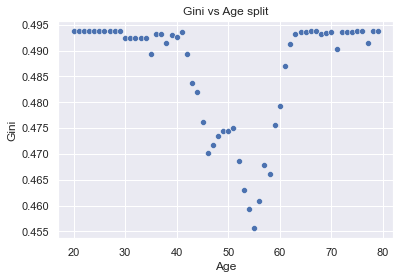

In [9]:
#10.	Compute the Gini value for all age splits where age ranges from 20 to 80.  
# Then plot the Gini split value for all the ages (age on x axis, Gini value on y axis).  
# What is the best age value for a split on age? - 55, since it has the lowest Gini
def giniSplitCalc(split_val):
    df_lo = df[df['age'] < split_val]
    df_hi = df[df['age'] >= split_val]

    counts_lo = [(df_lo['output'] == i).sum() for i in [0,1]]
    counts_hi = [(df_hi['output'] == i).sum() for i in [0,1]]

    gini_lo = gini(counts_lo)
    gini_hi = gini(counts_hi)

    fraction_lo = df_lo.shape[0]/df.shape[0]
    fraction_hi = df_hi.shape[0]/df.shape[0]
    gini_split = fraction_lo * gini_lo + fraction_hi * gini_hi
    
    return gini_split

giniList = []
for i in range(20, 80):
    giniList.append(giniSplitCalc(i))

#--------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.scatterplot(x=range(20, 80), y=giniList)
plt.xlabel('Age')
plt.ylabel('Gini')
plt.title('Gini vs Age split')